NUMBER RECOGNITION

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
print(x_train[10])

In [ ]:
print(x_train[10].shape)

(28, 28)


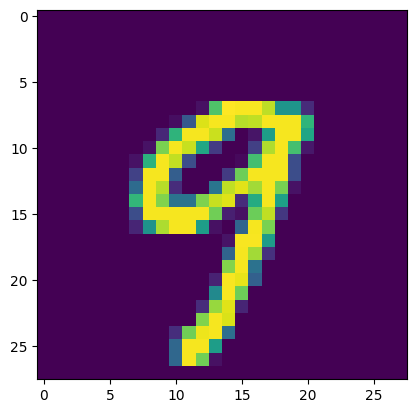

9


In [ ]:
plt.imshow(x_train[45])
plt.show()
print(y_train[45])

In [ ]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(10,activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2922 - accuracy: 0.9143
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1350 - accuracy: 0.9589
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1007 - accuracy: 0.9689
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0821 - accuracy: 0.9749
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0684 - accuracy: 0.9782
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0594 - accuracy: 0.9808
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0516 - accuracy: 0.9834
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0449 - accuracy: 0.9855
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0400 - accuracy: 0.9870
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.035

In [ ]:
loss,accuracy=model.evaluate(x_test,y_test)
print(accuracy*100)

313/313 [==============================] - 1s 4ms/step - loss: 0.0997 - accuracy: 0.9738
97.3800003528595


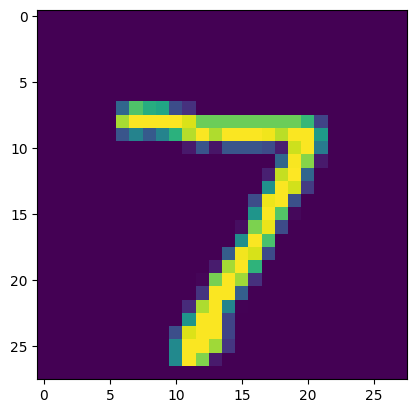

In [ ]:
plt.imshow(x_test[0])
plt.show()

In [ ]:
print(y_test[0])

7


In [ ]:
y_pred=model.predict(x_test)

313/313 [==============================] - 2s 4ms/step


In [ ]:
print(y_pred[0])

[2.8755149e-04 2.9773310e-01 5.7509875e-01 9.8286968e-01 4.6318743e-07
 1.2042212e-02 1.3899903e-10 9.9999851e-01 4.0928820e-01 7.1780515e-01]


In [ ]:
label=np.argmax(y_pred[0])
print(label)

7


In [ ]:
y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 4, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 8, 8, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
con_mat=confusion_matrix(y_test,y_pred_labels)
print(con_mat)

tf.Tensor(
[[ 958    1    2    1    2    3    4    4    3    2]
 [   0 1129    1    0    0    0    2    0    3    0]
 [   4    0 1006    1    2    0    2    9    8    0]
 [   0    0    6  981    0    8    0    6    6    3]
 [   0    0    4    0  957    0    4    4    5    8]
 [   1    0    0   13    1  865    2    2    7    1]
 [   6    2    2    0    5   11  927    1    4    0]
 [   1    6    5    2    2    0    0 1004    5    3]
 [   3    1    4    3    5    5    1    5  945    2]
 [   1    4    1    3    8    3    0   14    9  966]], shape=(10, 10), dtype=int32)


Text(0.5, 36.72222222222221, 'Predicted Labels')

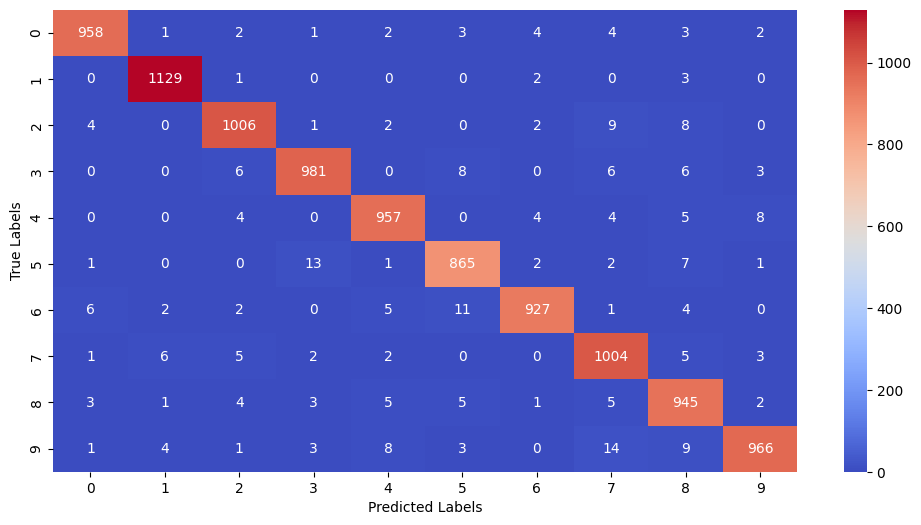

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(con_mat,annot=True,fmt='d',cmap='coolwarm')
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")

In [ ]:
input_image_path='/content/mnistimage.png'
input_image=cv2.imread(input_image_path)

In [ ]:
type(input_image)

numpy.ndarray

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape

(825, 829, 3)

In [ ]:
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape

(825, 829)

In [ ]:
input_image_resize=cv2.resize(grayscale,(28,28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize=input_image_resize/255

In [ ]:
image_reshaped=np.reshape(input_image_resize,[1,28,28])

In [ ]:
pred=model.predict(image_reshaped)
print(pred)

1/1 [==============================] - 0s 25ms/step
[[5.6579292e-01 3.4440207e-01 7.5538653e-01 3.9359699e-03 6.2635756e-01
  1.2990204e-03 9.9960095e-01 4.7602152e-04 3.5274159e-02 6.8238616e-04]]


In [ ]:
input_pred_label=np.argmax(pred)

In [ ]:
print(input_pred_label)

6
